In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import os
import string
from nltk import word_tokenize

In [2]:
os.getcwd()

'C:\\Users\\sunilchawla\\Desktop\\ass2\\code'

In [3]:
path = "../data_clean/"

In [4]:
df_train = pd.read_csv(path+"pos_neg.csv",sep = ",")
df_test = pd.read_csv(path+"pos_neg_test.csv",sep = ",")
df_unsup = pd.read_csv(path+"unsup.csv",sep = ",")
df_train.drop(['words','Unnamed: 0'], axis = 1, inplace = True)
df_test.drop(['words','Unnamed: 0'], axis = 1, inplace = True)
df_unsup.drop(['words','Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df_train.head()

movieID                                             review  rate  label  \
0        0  story of a man who has unnatural feelings for ...     3      0   
1    10000  airport '77 starts as a brand new luxury 747 p...     4      0   
2    10001  this film lacked something i could not put my ...     4      0   
3    10002  sorry everyone,,, i know this is supposed to b...     1      0   
4    10003  when i was little my parents took me along to ...     1      0   

                                          words_sent  
0  story man unnatural feeling pig start opening ...  
1  airport '77 start brand new luxury 747 plane l...  
2  film lacked something could not put finger fir...  
3  sorry everyone know supposed  art  film wow ha...  
4  little parent took along theater see interior ...

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
from gensim.models import Word2Vec
train_corpus = df_train['words_sent'].tolist()
test_corpus = df_test['words_sent'].tolist()
unsup_corpus = df_unsup['words_sent'].tolist()
comments = train_corpus + test_corpus + unsup_corpus
tok_comments = [nltk.word_tokenize(sent) for sent in comments]

2018-10-24 16:10:42,634 : INFO : 'pattern' package not found; tag filters are not available for English


In [9]:
model = Word2Vec(tok_comments, size = 64, min_count = 1, negative = 5)

2018-10-24 16:11:47,437 : INFO : collecting all words and their counts
2018-10-24 16:11:47,438 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-24 16:11:47,722 : INFO : PROGRESS: at sentence #10000, processed 1252945 words, keeping 70541 word types
2018-10-24 16:11:48,003 : INFO : PROGRESS: at sentence #20000, processed 2533136 words, keeping 109060 word types
2018-10-24 16:11:48,278 : INFO : PROGRESS: at sentence #30000, processed 3789443 words, keeping 140781 word types
2018-10-24 16:11:48,554 : INFO : PROGRESS: at sentence #40000, processed 5040107 words, keeping 169872 word types
2018-10-24 16:11:48,848 : INFO : PROGRESS: at sentence #50000, processed 6298317 words, keeping 196537 word types
2018-10-24 16:11:49,166 : INFO : PROGRESS: at sentence #60000, processed 7600075 words, keeping 223135 word types
2018-10-24 16:11:49,472 : INFO : PROGRESS: at sentence #70000, processed 8880335 words, keeping 247686 word types
2018-10-24 16:11:49,793 : INFO : 

In [10]:
word_vectors = model.wv
len(word_vectors.vocab)

316729

In [11]:
model.wv['not']

array([ 0.4172581 , -0.04705074,  0.58708644, -0.08365905,  0.40156826,
        1.99765   ,  1.5261085 ,  0.13734727, -0.8377375 ,  0.7951359 ,
       -2.0291448 , -0.03244576,  1.3669838 ,  1.74398   ,  3.1480753 ,
       -0.46222028, -1.6394619 , -2.2543576 ,  0.51523966, -0.7885389 ,
        3.5776217 , -1.3051748 ,  0.44026682, -1.4250143 ,  3.2479987 ,
       -0.00801506, -0.2567973 ,  2.5710375 , -1.1505815 , -0.5547743 ,
        1.5330055 , -1.0626575 ,  0.5814518 ,  1.5000143 ,  2.5503292 ,
       -1.617542  ,  2.074771  , -0.46007508, -2.8854816 , -0.5980136 ,
        1.838063  ,  3.3062959 ,  0.4581662 ,  0.6012066 ,  0.61742437,
       -1.3880136 , -0.06011336,  0.93012106, -1.2863183 ,  0.3440605 ,
       -3.312011  , -0.44967532,  0.25999177,  1.5899131 , -1.0873513 ,
       -1.1718601 , -0.9854605 , -1.0323207 , -1.3531827 ,  1.9615375 ,
       -0.0688651 ,  1.7462496 , -0.7157613 ,  0.6457235 ], dtype=float32)

In [12]:
embeddings_index = {}
for w in model.wv.vocab.keys():
    embeddings_index[w] = model.wv[w]

In [13]:
embeddings_index

{'story': array([-1.9948416e+00,  2.9164865e+00,  1.8279110e+00,  4.4876915e-01,
         4.3019838e+00, -1.1608375e+00,  3.3733866e+00,  2.1448133e+00,
        -1.3207172e+00, -2.5566597e-03, -3.1303046e+00, -3.3830335e+00,
        -5.2547395e-01,  7.2672898e-01,  1.4353534e+00, -7.6998132e-01,
         3.5767369e+00, -9.9459827e-01, -5.9083729e+00, -1.2560764e-01,
         5.5667171e+00, -1.0184640e+00, -3.0846233e+00,  2.4513021e+00,
         2.3245533e+00, -1.5663171e-01, -2.8442839e-01, -2.1689615e+00,
        -1.2227623e+00, -8.6122997e-02,  7.8902781e-01, -6.5100896e-01,
        -9.9828169e-02, -4.3355843e-01,  2.1743636e+00, -7.2897518e-01,
        -7.5359412e-02,  5.3212124e-01, -2.8058872e-01, -3.3145576e+00,
        -7.4292920e-03,  2.6919663e-01,  1.6355257e-01,  5.2721387e-01,
        -2.0410104e+00, -2.0929847e+00, -1.6499541e+00, -1.5949847e+00,
        -1.4031591e-01, -1.9650173e+00, -1.0837084e+00, -1.2552755e+00,
         5.6076325e-03, -2.3999367e+00,  2.1162724e+00,

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [15]:
tokenizer = Tokenizer(nb_words=None)
tokenizer.fit_on_texts(comments)

In [16]:
tokenizer.word_index.items()

dict_items([('not', 1), ('movie', 2), ('film', 3), ("'s", 4), ('one', 5), ('all', 6), ('like', 7), ('would', 8), ('time', 9), ('good', 10), ('character', 11), ('very', 12), ('up', 13), ('no', 14), ('story', 15), ('even', 16), ('get', 17), ('make', 18), ('see', 19), ('really', 20), ('well', 21), ('scene', 22), ('much', 23), ('could', 24), ('bad', 25), ('people', 26), ('great', 27), ('also', 28), ('first', 29), ('most', 30), ('way', 31), ('show', 32), ('thing', 33), ('made', 34), ('life', 35), ('too', 36), ('think', 37), ('the', 38), ('go', 39), ('know', 40), ('watch', 41), ('love', 42), ('two', 43), ('plot', 44), ('many', 45), ('actor', 46), ('seen', 47), ('year', 48), ('end', 49), ('never', 50), ('look', 51), ('say', 52), ('acting', 53), ('best', 54), ('little', 55), ('over', 56), ('ever', 57), ('man', 58), ('better', 59), ('take', 60), ('come', 61), ('still', 62), ('work', 63), ('part', 64), ('something', 65), ('find', 66), ('director', 67), ('give', 68), ('back', 69), ('want', 70), (

In [17]:
train_sequences = tokenizer.texts_to_sequences(df_train['words_sent'])

In [18]:
train_sequences

[[15,
  58,
  6508,
  338,
  3244,
  144,
  533,
  22,
  1235,
  347,
  1779,
  102,
  10420,
  6449,
  176,
  545,
  1885,
  959,
  2264,
  825,
  12806,
  1432,
  389,
  548,
  1779,
  135,
  9,
  14,
  633,
  1232,
  753,
  149,
  36,
  1383,
  16,
  816,
  545,
  11675,
  294,
  8,
  18,
  2159,
  221,
  644,
  706,
  8553,
  1833,
  422,
  59,
  150,
  37,
  10,
  546,
  589,
  27,
  34251,
  35835,
  589,
  113,
  3316,
  20103,
  10227,
  5897,
  47,
  3151],
 [3775,
  24394,
  144,
  3133,
  90,
  7385,
  13571,
  1215,
  4583,
  13,
  4176,
  2549,
  8732,
  818,
  4573,
  3207,
  4214,
  508,
  1684,
  1542,
  647,
  19745,
  4,
  3398,
  7355,
  2985,
  920,
  4146,
  28,
  1519,
  4214,
  396,
  1857,
  6812,
  30493,
  329,
  7385,
  50193,
  60,
  3360,
  1626,
  783,
  1215,
  4936,
  19429,
  904,
  1359,
  5284,
  418,
  37696,
  43,
  8188,
  4,
  10162,
  12049,
  20463,
  2209,
  413,
  28594,
  2567,
  3490,
  735,
  2755,
  2226,
  819,
  1130,
  4176,
  9297,
  1

In [19]:
test_sequences = tokenizer.texts_to_sequences(df_test['words_sent'])

In [20]:
len(train_sequences)

25000

In [21]:
len(test_sequences)

25000

In [22]:
len(tokenizer.word_index)

148793

In [23]:
pad_train_seq = pad_sequences(train_sequences, maxlen=400,padding='pre',truncating = 'pre')

In [24]:
pad_test_seq = pad_sequences(test_sequences, maxlen=400,padding='pre',truncating = 'pre')

In [25]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 64))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros
        embedding_matrix[i] = embedding_vector

In [26]:
embedding_matrix.shape

(148794, 64)

In [27]:
pad_train_seq.shape

(25000, 400)

In [28]:
pad_test_seq.shape

(25000, 400)

In [29]:
from keras.layers import Embedding

embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            64,
                            weights=[embedding_matrix],
                            input_length=400,
                            trainable = True)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.normalization import BatchNormalization

In [31]:
Y_train = df_train['label']
Y_test = df_test['label']

In [90]:
model_cnn = Sequential()
model_cnn.add(embedding_layer)
model_cnn.add(Conv1D(64, 5, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(3))
model_cnn.add(Conv1D(32, 5, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(3))# global max pooling
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.2))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(64, activation='relu')) #fully connected layer
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(model_cnn.summary())
hist_cnn = model_cnn.fit(pad_train_seq, Y_train, epochs=20, batch_size=128, validation_split=0.33,shuffle=True,verbose = 1)

16750/16750 [==============================] - 56s 3ms/step - loss: 0.4407 - acc: 0.8033 - val_loss: 0.7878 - val_acc: 0.6282
Epoch 2/20
16750/16750 [==============================] - 55s 3ms/step - loss: 0.2897 - acc: 0.8787 - val_loss: 0.7250 - val_acc: 0.6705
Epoch 3/20
16750/16750 [==============================] - 58s 3ms/step - loss: 0.2092 - acc: 0.9164 - val_loss: 0.5947 - val_acc: 0.7461
Epoch 4/20
16750/16750 [==============================] - 60s 4ms/step - loss: 0.1396 - acc: 0.9482 - val_loss: 2.3276 - val_acc: 0.3441
Epoch 5/20
16750/16750 [==============================] - 57s 3ms/step - loss: 0.0841 - acc: 0.9699 - val_loss: 0.8119 - val_acc: 0.7319
Epoch 6/20
16750/16750 [==============================] - 61s 4ms/step - loss: 0.0523 - acc: 0.9831 - val_loss: 2.3015 - val_acc: 0.4972
Epoch 7/20
16750/16750 [==============================] - 58s 3ms/step - loss: 0.0336 - acc: 0.9878 - val_loss: 0.5472 - val_acc: 0.8648
Epoch 8/20
16750/16750 [============================

In [91]:
model_cnn.evaluate(pad_test_seq, Y_test, batch_size=32,verbose=1)

25000/25000 [==============================] - 19s 744us/step


[1.0854186069879121, 0.81752]

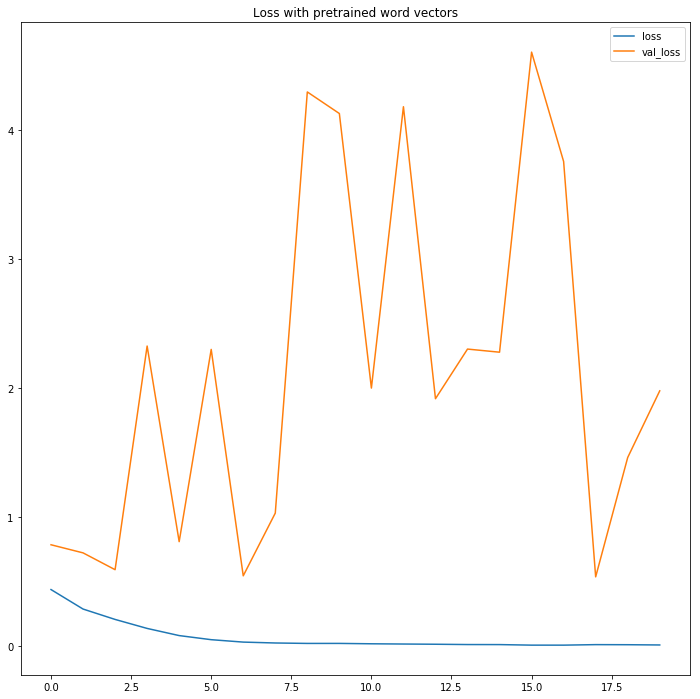

In [92]:
history_cnn = pd.DataFrame(hist_cnn.history)
plt.figure(figsize=(12,12));
plt.plot(history_cnn["loss"]);
plt.plot(history_cnn["val_loss"]);
plt.title("Loss with pretrained word vectors-CNN MODEL");
plt.legend()
plt.show();

## LSTM

In [32]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam

In [33]:
comment_input = Input(shape=(400,), dtype='int32')
embedded_sequences = embedding_layer(comment_input)
embedded_sequences = SpatialDropout1D(0.4)(embedded_sequences)
x = LSTM(100, return_sequences=False)(embedded_sequences)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(1, activation='sigmoid')(x)
model_lstm = Model(inputs=[comment_input], outputs=preds)
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(model_lstm.summary())
hist_lstm = model_lstm.fit(pad_train_seq, Y_train, epochs=10, batch_size=256, validation_split=0.1,shuffle=True,verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 400)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 400, 64)           9522816   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total para

In [34]:
model_lstm.evaluate(pad_test_seq, Y_test, batch_size=32,verbose=1)

25000/25000 [==============================] - 33s 1ms/step


[0.30903545918226244, 0.8898]

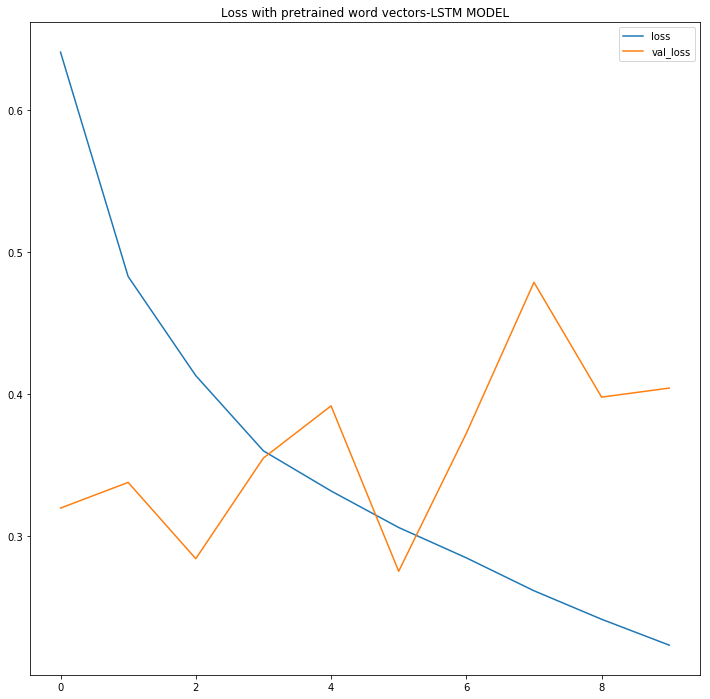

In [35]:
history_lstm = pd.DataFrame(hist_lstm.history)
plt.figure(figsize=(12,12));
plt.plot(history_lstm["loss"]);
plt.plot(history_lstm["val_loss"]);
plt.title("Loss with pretrained word vectors-LSTM MODEL");
plt.legend();
plt.show();

## LSTM + CNN 

In [44]:
model_lstm_cnn = Sequential()
model_lstm_cnn.add(embedding_layer)
model_lstm_cnn.add(SpatialDropout1D(0.4))
model_lstm_cnn.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_lstm_cnn.add(MaxPooling1D(pool_size=3))
model_lstm_cnn.add(LSTM(100))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.2))
model_lstm_cnn.add(Dense(1, activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm_cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           9522816   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 400, 64)           12352     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 133, 64)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
__________

In [48]:
hist_lstm_cnn = model_lstm_cnn.fit(pad_train_seq, Y_train, epochs=20, batch_size=256, validation_split=0.33,shuffle=True,verbose = 1)

Train on 16750 samples, validate on 8250 samples
Epoch 1/20
16750/16750 [==============================] - 72s 4ms/step - loss: 0.0567 - acc: 0.9793 - val_loss: 0.5915 - val_acc: 0.8228
Epoch 2/20
16750/16750 [==============================] - 74s 4ms/step - loss: 0.0457 - acc: 0.9833 - val_loss: 0.8049 - val_acc: 0.7938
Epoch 3/20
16750/16750 [==============================] - 76s 5ms/step - loss: 0.0447 - acc: 0.9847 - val_loss: 0.5885 - val_acc: 0.8322
Epoch 4/20
16750/16750 [==============================] - 76s 5ms/step - loss: 0.0446 - acc: 0.9832 - val_loss: 0.3281 - val_acc: 0.9000
Epoch 5/20
16750/16750 [==============================] - 78s 5ms/step - loss: 0.0381 - acc: 0.9861 - val_loss: 1.1751 - val_acc: 0.7007
Epoch 6/20
16750/16750 [==============================] - 82s 5ms/step - loss: 0.0338 - acc: 0.9883 - val_loss: 0.4784 - val_acc: 0.8697
Epoch 7/20
16750/16750 [==============================] - 76s 5ms/step - loss: 0.0356 - acc: 0.9889 - val_loss: 0.6929 - val_acc:

In [46]:
model_lstm_cnn.evaluate(pad_test_seq, Y_test, batch_size=32,verbose=1)

25000/25000 [==============================] - 18s 720us/step


[0.6365252888548374, 0.83676]

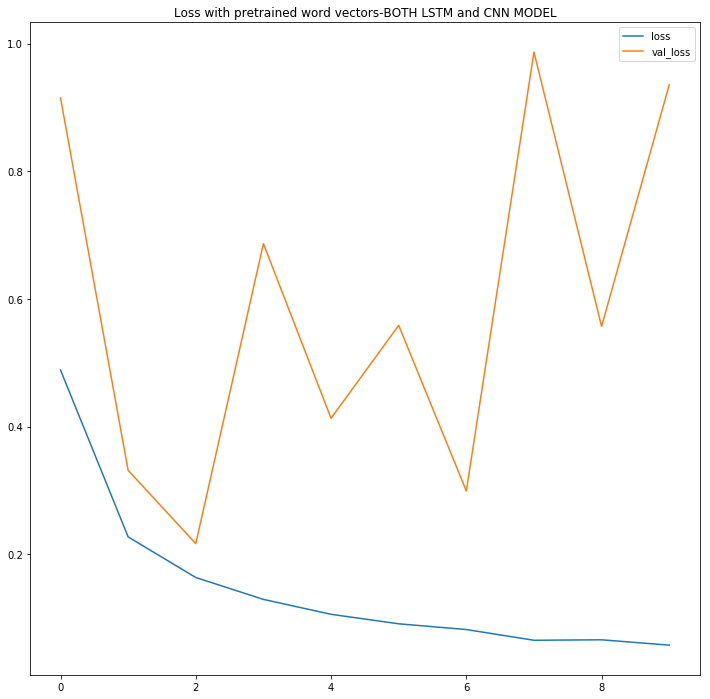

In [47]:
history_lstm_cnn = pd.DataFrame(hist_lstm_cnn.history)
plt.figure(figsize=(12,12));
plt.plot(history_lstm_cnn["loss"]);
plt.plot(history_lstm_cnn["val_loss"]);
plt.title("Loss with pretrained word vectors-BOTH LSTM and CNN MODEL");
plt.legend();
plt.show();